In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# TRAIN

In [2]:
train_data = pd.read_excel('data_train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data = pd.read_excel('data_test.xlsx')

In [5]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data['Flight_day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [10]:
train_data['Flight_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight_day,Flight_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [13]:
train_data['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
22:55 02 Mar      1
06:35 28 May      1
02:20 22 Mar      1
14:35 25 May      1
00:25 04 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [14]:
train_data['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:50      1
01:35      1
16:25      1
12:45      1
21:40      1
Name: Dep_Time, Length: 222, dtype: int64

In [15]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [16]:
train_data['Dep_minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight_day,Flight_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [19]:
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flight_day,Flight_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
train_data.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Flight_day,Flight_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
duration = list(train_data['Duration'])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [24]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + '0m'
        else:
            duration[i] = '0h' + duration[i]

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 

In [26]:
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split(sep='h')[-1]))

In [27]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_minutes

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Flight_day,Flight_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
Airline            10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
Flight_day         10682 non-null int64
Flight_month       10682 non-null int64
Dep_hour           10682 non-null int64
Dep_minute         10682 non-null int64
Arrival_hour       10682 non-null int64
Arrival_minute     10682 non-null int64
Duration_hours     10682 non-null int64
Duration_mins      10682 non-null int64
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


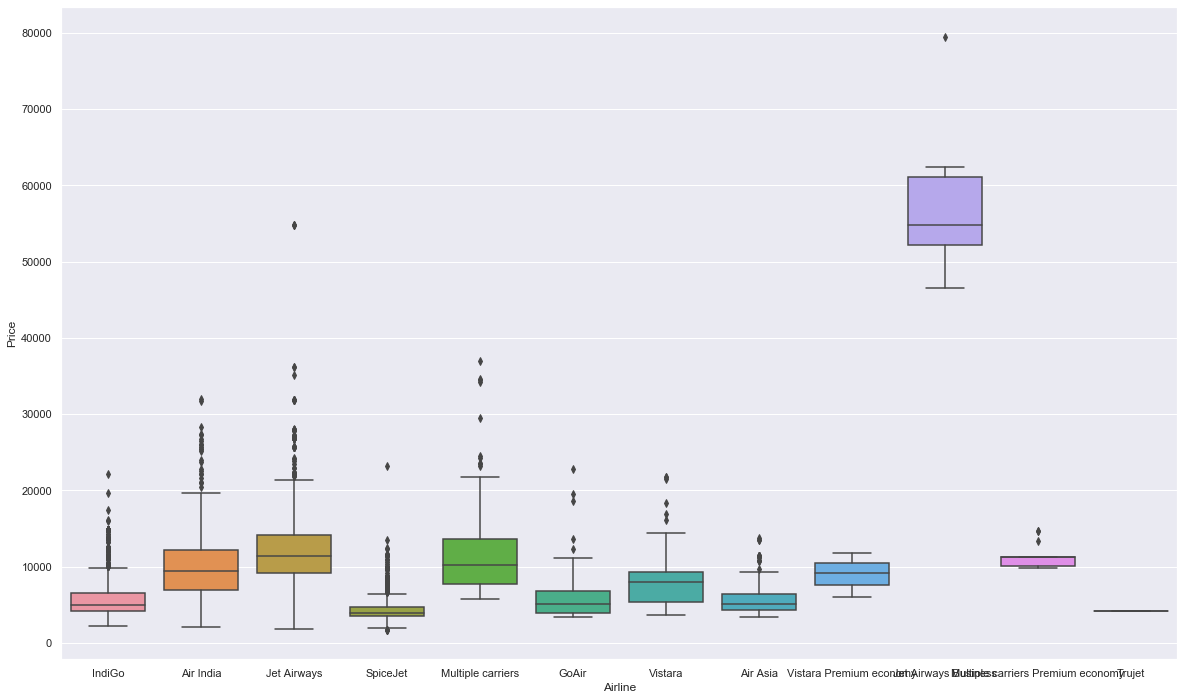

In [31]:
plt.figure(figsize=(20,12))
sns.boxplot(x=train_data['Airline'], y=train_data['Price'], data=train_data.sort_values("Price", ascending=False))

In [32]:
airlines = pd.get_dummies(train_data['Airline'], drop_first=True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


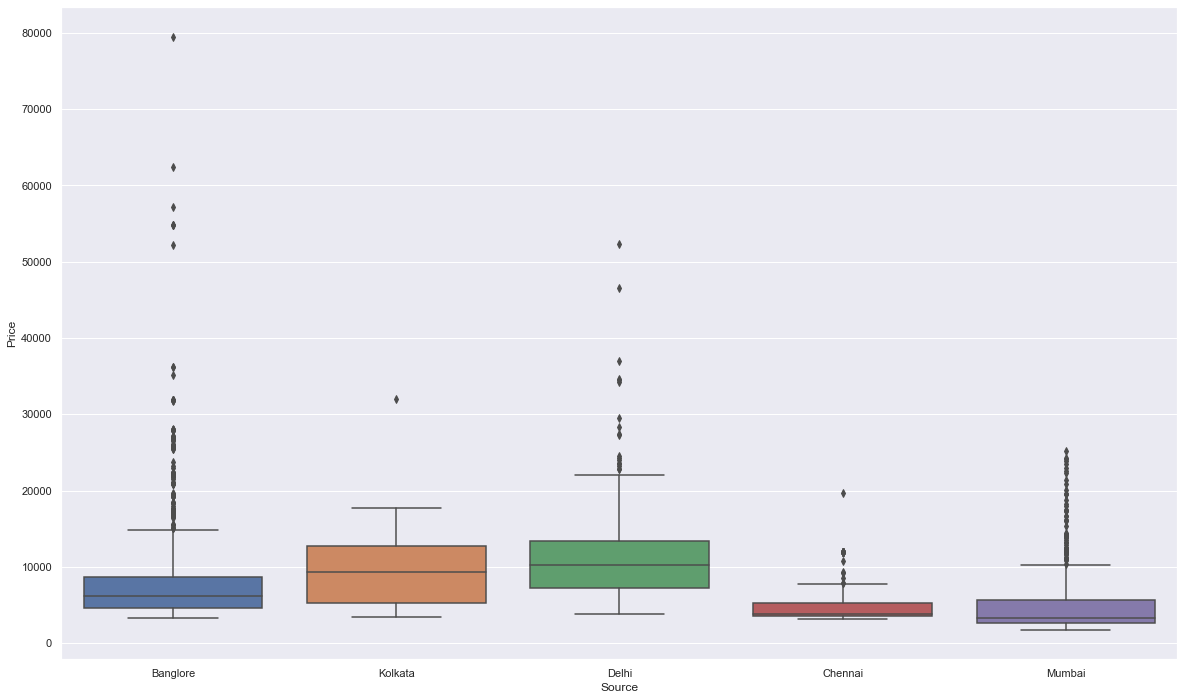

In [33]:
plt.figure(figsize=(20,12))
sns.boxplot(x=train_data['Source'], y=train_data['Price'], data=train_data)

In [34]:
sources = pd.get_dummies(train_data['Source'], drop_first=True)
sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


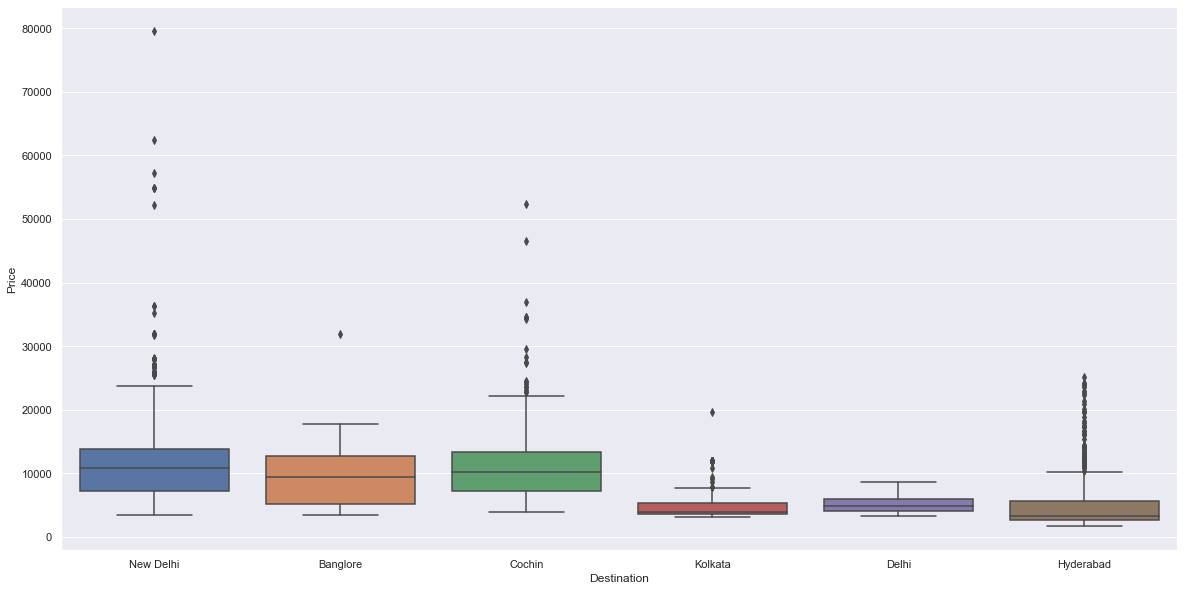

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_data['Destination'], y=train_data['Price'], data=train_data)

In [36]:
destinations = pd.get_dummies(train_data['Destination'], drop_first=True)
destinations.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [38]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → JAI → DEL → HYD       1
BOM → GOI → HYD             1
BOM → DED → DEL → HYD       1
CCU → VTZ → BLR             1
CCU → IXA → BLR             1
Name: Route, Length: 128, dtype: int64

In [39]:
train_data.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

In [40]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
train_data.replace({'1 stop': 1, 'non-stop': 0, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [42]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Flight_day,Flight_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
data_train = pd.concat([train_data, airlines, sources, destinations], axis=1)

In [44]:
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [45]:
data_train.head()

,Total_Stops,Price,Flight_day,Flight_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
Total_Stops                          10682 non-null int64
Price                                10682 non-null int64
Flight_day                           10682 non-null int64
Flight_month                         10682 non-null int64
Dep_hour                             10682 non-null int64
Dep_minute                           10682 non-null int64
Arrival_hour                         10682 non-null int64
Arrival_minute                       10682 non-null int64
Duration_hours                       10682 non-null int64
Duration_mins                        10682 non-null int64
Air India                            10682 non-null uint8
GoAir                                10682 non-null uint8
IndiGo                               10682 non-null uint8
Jet Airways                          10682 non-null uint8
Jet Airways Business                 10682 non-null uint8
Multiple carriers    

In [47]:
data_train.shape

(10682, 30)

# TEST

In [48]:
test_data = pd.read_excel('data_test.xlsx')

In [49]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [51]:
test_data.dropna(inplace=True)

In [52]:
test_data['Flight_day'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [53]:
test_data['Flight_month'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [54]:
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [55]:
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

In [56]:
test_data["Dep_minute"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

In [57]:
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [58]:
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minute"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

In [59]:
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [60]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [61]:
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

In [62]:
test_data.drop(["Duration"], axis = 1, inplace = True)

In [63]:
airline = pd.get_dummies(test_data["Airline"], drop_first= True)
source = pd.get_dummies(test_data["Source"], drop_first= True)
destination = pd.get_dummies(test_data["Destination"], drop_first = True)

In [64]:
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [65]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [66]:
data_test = pd.concat([test_data, airline, source, destination], axis = 1)

In [67]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [68]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
Total_Stops                          2671 non-null int64
Flight_day                           2671 non-null int64
Flight_month                         2671 non-null int64
Dep_hour                             2671 non-null int64
Dep_minute                           2671 non-null int64
Arrival_hour                         2671 non-null int64
Arrival_minute                       2671 non-null int64
Duration_hours                       2671 non-null int64
Duration_mins                        2671 non-null int64
Air India                            2671 non-null uint8
GoAir                                2671 non-null uint8
IndiGo                               2671 non-null uint8
Jet Airways                          2671 non-null uint8
Jet Airways Business                 2671 non-null uint8
Multiple carriers                    2671 non-null uint8
Multiple carriers Premium economy    2

In [69]:
data_test.shape

(2671, 28)

# Feature Selection 

In [70]:
X = data_train.drop("Price", axis=1)
y = data_train['Price']

In [71]:
X.head(), y.head()

(   Total_Stops  Flight_day  Flight_month  Dep_hour  Dep_minute  Arrival_hour  \
 0            0          24             3        22          20             1   
 1            2           1             5         5          50            13   
 2            2           9             6         9          25             4   
 3            1          12             5        18           5            23   
 4            1           1             3        16          50            21   
 
    Arrival_minute  Duration_hours  Duration_mins  Air India  ...  \
 0              10               2             50          0  ...   
 1              15               7             25          1  ...   
 2              25              19              0          0  ...   
 3              30               5             25          0  ...   
 4              35               4             45          0  ...   
 
    Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
 0               

In [72]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

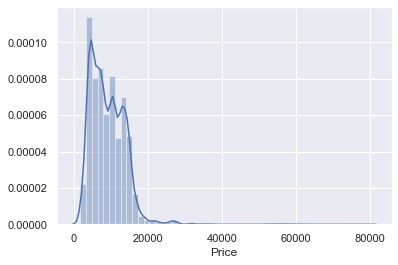

In [73]:
sns.distplot(y)
plt.show()

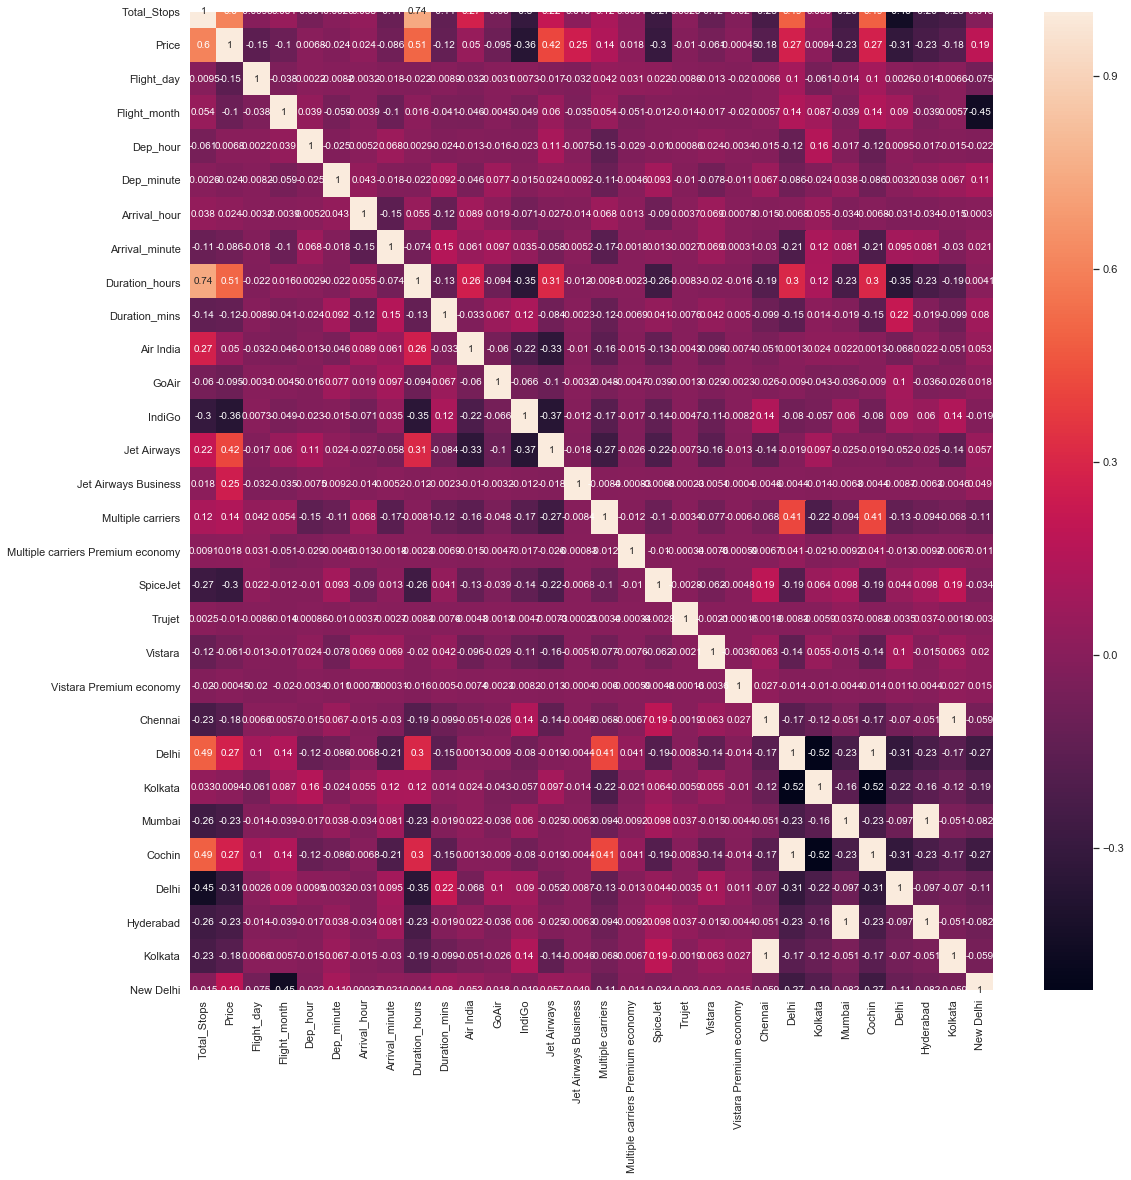

In [74]:
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True)

plt.show()

In [75]:
from sklearn.ensemble import RandomForestRegressor
selection = RandomForestRegressor(random_state=1)
selection.fit(X,y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

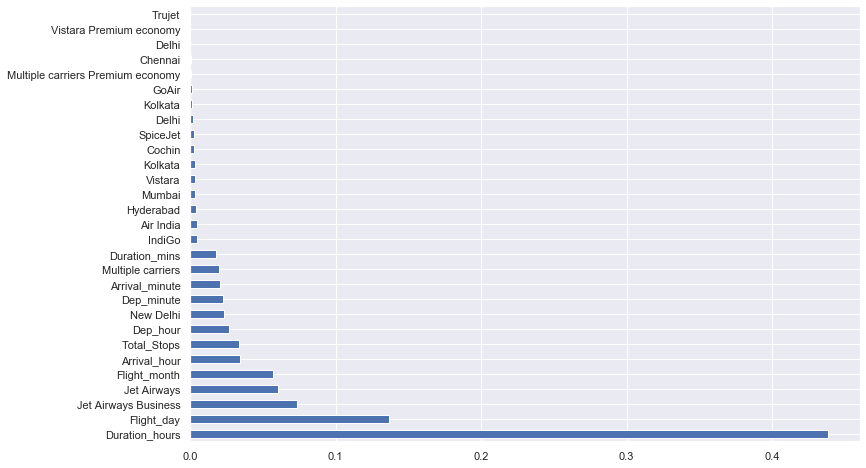

In [76]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# Fitting model using RF

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=1)

In [78]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [79]:
y_pred = rf_model.predict(X_valid)

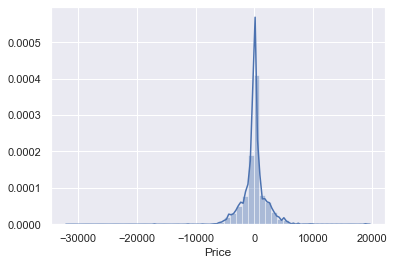

In [80]:
sns.distplot(y_pred - y_valid)
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
print('MAE: ', mean_absolute_error(y_pred, y_valid))
print('RMSE: ', np.sqrt(mean_squared_error(y_pred, y_valid)))

MAE:  1259.9667215574423
RMSE:  2121.7213006578986


# Hyperparameter tuning RF

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [91]:
n_estimators = [int(x) for x in np.linspace(100, 1500, num=15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]

In [92]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                 'bootstrap': bootstrap}

In [93]:
rf_random = RandomizedSearchCV(rf_model, param_dist, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 5, verbose = 2, random_state = 1, n_jobs = -1)

In [94]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 30.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=1...


In [95]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [96]:
rf_random_best = pd.DataFrame(rf_random.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rf_random_best = rf_random_best.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rf_random_best.head(20)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,900,10,1,sqrt,30,False,-3.300351e+06,-5.155369e+06,-3.930267e+06,1
1,1000,5,2,auto,15,True,-2.950148e+06,-4.741361e+06,-3.963307e+06,2
2,400,5,1,auto,25,True,-3.061224e+06,-4.727239e+06,-3.963957e+06,3
3,700,15,1,sqrt,25,False,-3.315675e+06,-5.226947e+06,-3.969179e+06,4
4,500,10,2,auto,15,True,-2.922508e+06,-4.768460e+06,-4.007113e+06,5
5,1100,10,2,auto,20,True,-2.946883e+06,-4.779993e+06,-4.017611e+06,6
6,800,5,2,sqrt,20,False,-3.397996e+06,-5.300385e+06,-4.077594e+06,7
7,1500,2,1,auto,25,True,-3.271867e+06,-4.814308e+06,-4.101227e+06,8
8,700,2,2,sqrt,30,False,-3.495830e+06,-5.287534e+06,-4.106988e+06,9
9,700,2,2,sqrt,25,False,-3.475299e+06,-5.303079e+06,-4.107233e+06,10


In [97]:
n_estimators = [900, 1000, 1100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 30, num=5)]
min_samples_split = [5, 10]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [98]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
gs_rf = GridSearchCV(rf_model, param_grid, cv = 3, verbose = 2, n_jobs=-1)


In [100]:
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 138.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 147.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
            

In [101]:
best_model_rf = gs_rf.best_estimator_
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1100}

In [102]:
prediction_rf = best_model_rf.predict(X_valid)

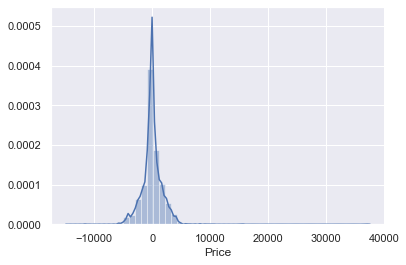

In [103]:
sns.distplot(y_valid - prediction_rf)
plt.show()

In [84]:
##best_model_rf = GridSearchCV(rf_model, param_grid, cv = 3, verbose = 2, n_jobs=-1)
best_model_rf = RandomForestRegressor(n_estimators = 1100,
                max_features = 'auto',
                max_depth = 20,
                min_samples_split = 10,
                min_samples_leaf = 1,
                bootstrap = True, 
                random_state=1)

In [85]:
best_model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=1100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [86]:
prediction_rf = best_model_rf.predict(X_valid)

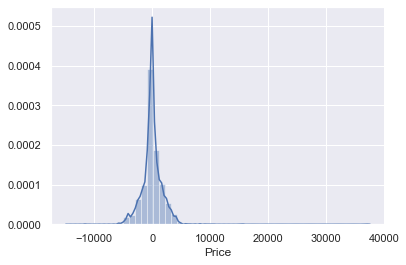

In [87]:
sns.distplot(y_valid - prediction_rf)
plt.show()

In [88]:
print('MAE: ', mean_absolute_error(y_valid, prediction_rf))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid, prediction_rf)))

MAE:  1162.9518882111277
RMSE:  1896.7808495539061


In [92]:
import pickle

file = open('random_forest_airticket_prediction.pkl', 'wb')

pickle.dump(best_model_rf, file)